# 1. Problem
MNIST handwritten digits dataset contains 55,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [1]:
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist_data/", one_hot=True)

Extracting ./mnist_data/train-images-idx3-ubyte.gz
Extracting ./mnist_data/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/t10k-labels-idx1-ubyte.gz


In [2]:
train_images, train_labels = mnist.train.images, mnist.train.labels
test_images, test_labels = mnist.test.images, mnist.test.labels
num_examples = mnist.train.num_examples
print("num_examples: ", num_examples)
print("train_images shape: ", train_images.shape)
print("train_labels shape: ", train_labels.shape)
print("test_images shape: ", test_images.shape)
print("test_labels shape: ", test_labels.shape)

num_examples:  55000
train_images shape:  (55000, 784)
train_labels shape:  (55000, 10)
test_images shape:  (10000, 784)
test_labels shape:  (10000, 10)


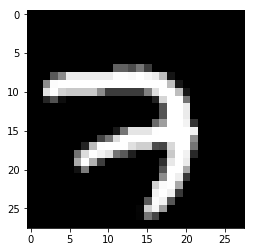

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
7


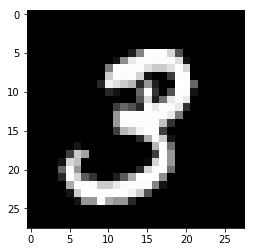

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
3


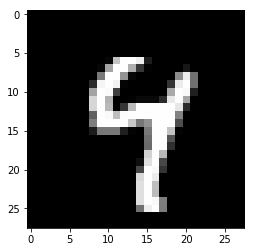

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
4


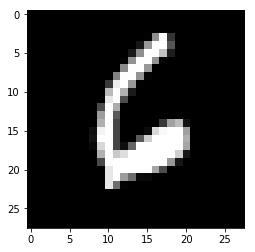

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
6


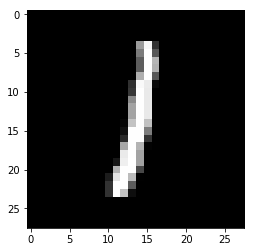

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
1


In [10]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(5):
    plt.imshow(np.reshape(train_images[i], [28, 28]), cmap="gray")
    plt.show()
    print(train_labels[i])
    print(np.argmax(train_labels[i]))

# 2. Logistic Regression
![](images/LogisticRegression.png)
![](images/sigmoid.png)
![](images/multiclass.png)
![](images/softmax.png)

# 3. Model

In [4]:
x = tf.placeholder(tf.float32, [None, 784])     # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10])      # 0-9 digits recognition => 10 classes

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
pred = tf.nn.softmax(tf.matmul(x, W) + b)       # Softmax

# 4. Cross Entropy
![](images/cross_entropy.jpg)

In [5]:
# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=1))
# Gradient Descent
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 5. Train

In [9]:
# Parameters
training_epochs = 100
batch_size = 100
display_step = 5

sess = tf.Session()

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
sess.run(init)

# Record learning curve
lc_epoch = []
lc_cost = []

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(num_examples / batch_size)
    for i in range(total_batch):
        batch_Xs, batch_Ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_Xs, y: batch_Ys})
        avg_cost += c / total_batch
    if epoch == 0 or (epoch + 1) % display_step == 0:
        print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.9f}".format(avg_cost))
        lc_epoch.append(epoch + 1)
        lc_cost.append(avg_cost)
                
print("Optimization Finished!")

correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# Calculate accuracy for 3000 examples
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", sess.run(accuracy, feed_dict={x: test_images, y: test_labels}))

Epoch: 0001 cost= 1.184513935
Epoch: 0005 cost= 0.465536795
Epoch: 0010 cost= 0.392382777
Epoch: 0015 cost= 0.362708135
Epoch: 0020 cost= 0.345435244
Epoch: 0025 cost= 0.333683217
Epoch: 0030 cost= 0.325066203
Epoch: 0035 cost= 0.318321127
Epoch: 0040 cost= 0.312858724
Epoch: 0045 cost= 0.308362563
Epoch: 0050 cost= 0.304497520
Epoch: 0055 cost= 0.301128197
Epoch: 0060 cost= 0.298253350
Epoch: 0065 cost= 0.295700456
Epoch: 0070 cost= 0.293358165
Epoch: 0075 cost= 0.291292247
Epoch: 0080 cost= 0.289387304
Epoch: 0085 cost= 0.287681097
Epoch: 0090 cost= 0.286078681
Epoch: 0095 cost= 0.284561285
Epoch: 0100 cost= 0.283207278
Optimization Finished!
Accuracy: 0.9221


# 6. Learning Curve

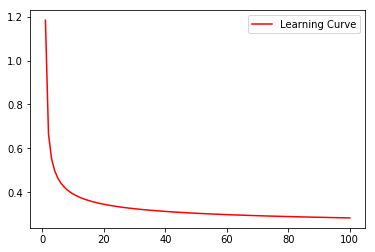

In [7]:
plt.plot(lc_epoch, lc_cost, 'r-', label='Learning Curve')
plt.legend()
plt.show()

# 7. Error

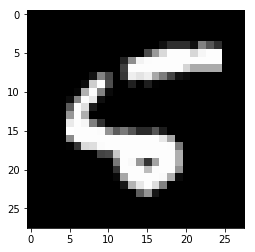

label:  5   prediction:  6


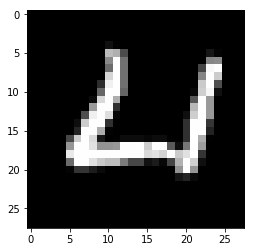

label:  4   prediction:  6


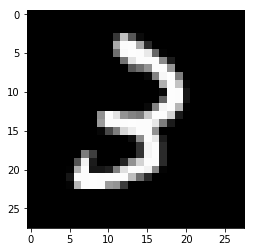

label:  3   prediction:  2


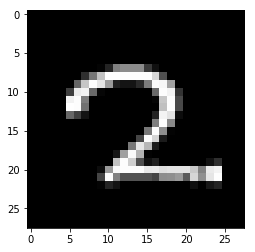

label:  2   prediction:  7


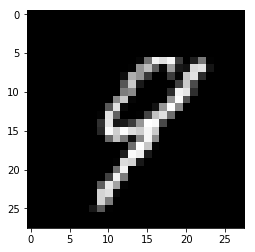

label:  9   prediction:  4


In [8]:
error_pred = tf.not_equal(tf.argmax(pred, 1), tf.argmax(y, 1))
error, p = sess.run([error_pred, pred], feed_dict={x: test_images, y: test_labels})
error_images = test_images[error]
error_labels = test_labels[error]
error_p = p[error]

for i in range(5):
    plt.imshow(np.reshape(error_images[i], [28, 28]), cmap="gray")
    plt.show()
    print("label: ", np.argmax(error_labels[i]), "  prediction: ", np.argmax(error_p[i]))